#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [1]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
#import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [3]:
import os
import shutil
import pandas as pd
import zipfile
zip_folder_path = r'C:\Users\chand\Datamining\Datamining\New folder\car_evaluation.zip'


# Extract the contents of the zipped folder
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

# List all CSV files in the extracted folder
csv_files = [f for f in os.listdir('extracted_folder') if f.endswith('.csv')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for csv_file in csv_files:
    file_path = os.path.join('extracted_folder', csv_file)
    df = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, df], ignore_index=True)

# Optional: If you want to save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

# Cleanup: Remove the extracted folder if needed
shutil.rmtree('extracted_folder')


In [4]:
df = pd.read_csv('merged_data.csv')
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df = pd.get_dummies(df, columns = ['buyPrice', 'maintCost', 'bootLuggage','noDoors','noPersons','safety'])
df

,decision,buyPrice_high,buyPrice_low,buyPrice_med,buyPrice_vhigh,maintCost_high,maintCost_low,maintCost_med,maintCost_vhigh,bootLuggage_big,...,noDoors_2,noDoors_3,noDoors_4,noDoors_5more,noPersons_2,noPersons_4,noPersons_more,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,unacc,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,unacc,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,unacc,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,unacc,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,good,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1723,vgood,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1724,unacc,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1725,good,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [7]:
X = df.loc[:, df.columns != 'decision']
y = df.decision

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .10, random_state = 42)

print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1554, 21)
(173, 21)
(1554,)
(173,)


In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'decision' is your target variable
X = df.drop('decision', axis=1)
y = df['decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.95

Confusion Matrix:
 [[ 68   1   6   2]
 [  0  12   0   3]
 [  2   0 235   0]
 [  1   2   0  14]]

Classification Report:
               precision    recall  f1-score   support

         acc       0.96      0.88      0.92        77
        good       0.80      0.80      0.80        15
       unacc       0.98      0.99      0.98       237
       vgood       0.74      0.82      0.78        17

    accuracy                           0.95       346
   macro avg       0.87      0.87      0.87       346
weighted avg       0.95      0.95      0.95       346



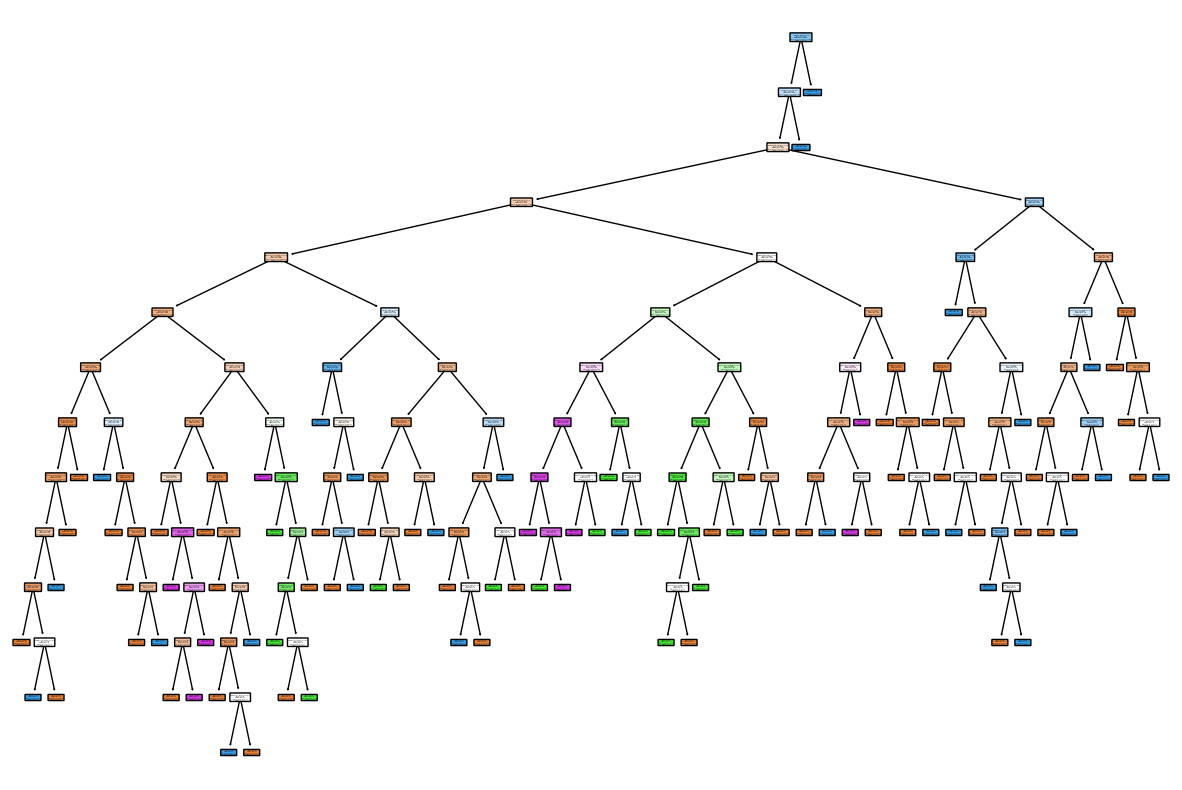

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained Decision Tree model
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(X.columns), class_names=df['decision'].unique().tolist(), filled=True, rounded=True)
plt.show()



In [15]:
from sklearn.tree import export_graphviz
from IPython.display import display, Image
import graphviz
import os

graphviz_path = 'C:\\Program Files\\Graphviz\\bin'
# Export the decision tree to DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=df['decision'].unique().astype(str),
    filled=True,
    rounded=True
)

# Create a Graphviz object
graph = graphviz.Source(dot_data, format="png", engine="dot")

# Add Graphviz bin directory to the system PATH
os.environ["PATH"] += os.pathsep + graphviz_path

# Save the rendered output to a file
output_file_path = "decision_tree.png"
graph.render(output_file_path, cleanup=True, format="png", engine="dot")


'decision_tree.png.png'

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################